In [1]:
import pandas as pd
import numpy as np
#import statsmodels.formula.api as smf
import statsmodels.api as sm
#from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb

OnlineNewsPopularity = pd.read_csv("OnlineNewsPopularity.csv")

In [2]:
from sklearn.model_selection import cross_val_score,train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    OnlineNewsPopularity.drop([' shares', 'url'], axis = 1),
    OnlineNewsPopularity[' shares'],
    test_size = 0.2,
    random_state = 42)

In [3]:
train = pd.concat([X_train, y_train], axis = 1)
X = pd.concat([X_train, X_test], axis = 0)
y = pd.concat([y_train, y_test], axis = 0)
train.rename(columns = {' share': 'share'}, inplace = True)

# XGBoost base model:

In [4]:
#RMSE based on the parameter values that provide a cross validation R-squared close to the optimal one
model = xgb.XGBRegressor().fit(X_train, y_train)

In [5]:
from sklearn.metrics import mean_squared_error
print("XGBoost RMSE = ",np.sqrt(mean_squared_error(model.predict(X_test),y_test)))

XGBoost RMSE =  11786.667783417977


In [6]:
from sklearn.model_selection import KFold
scores = cross_val_score(model, X_train, y_train, scoring='r2') 
scores.mean()

-0.21871438225859458

# Gradient Model

In [7]:
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier

model5 = GradientBoostingRegressor()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

11019.450582185947

In [8]:
from sklearn.model_selection import KFold
scores = cross_val_score(model5, X_train, y_train, scoring='r2') 
scores.mean()

-0.04268543306259263

# Models from 303-2:

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [10]:
test = pd.concat([X_test, y_test], axis=1)
test

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
32340,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,...,0.100000,0.80,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900
10480,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,1.0,1.0,...,0.136364,1.00,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300
15370,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.0,1.0,...,0.375000,0.50,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700
31592,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.0,1.0,...,0.500000,0.50,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500
198,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,0.0,0.0,...,0.100000,0.60,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31669,133.0,9.0,342.0,0.504399,1.0,0.634146,7.0,3.0,2.0,0.0,...,0.136364,0.80,-0.183333,-0.30,-0.125000,0.0,0.00,0.5,0.00,2200
34677,86.0,8.0,958.0,0.439830,1.0,0.638060,12.0,5.0,1.0,0.0,...,0.033333,0.70,-0.218056,-0.40,-0.050000,0.0,0.00,0.5,0.00,1400
15785,427.0,13.0,1153.0,0.427951,1.0,0.631825,6.0,3.0,1.0,2.0,...,0.062500,1.00,-0.425621,-1.00,-0.025000,0.0,0.00,0.5,0.00,528
23738,265.0,9.0,702.0,0.478448,1.0,0.654912,5.0,5.0,0.0,1.0,...,0.100000,1.00,-0.305556,-0.50,-0.100000,0.0,0.00,0.5,0.00,3200


In [11]:
#Taking the log transform of house_price as house prices have a right-skewed distribution
y = np.log(train[' shares'])

In [12]:
#Standardizing predictors so that each of them have zero mean and unit variance
#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X_train)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X_train)

## (a) Ridge

In [13]:
#The tuning parameter lambda is referred as alpha in sklearn

#Creating a range of values of the tuning parameter to visualize the ridge regression coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,200)*0.5

In [14]:
#Finding the ridge regression coefficients for increasing values of the tuning parameter
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

Text(0, 0.5, 'Standardized coefficient')

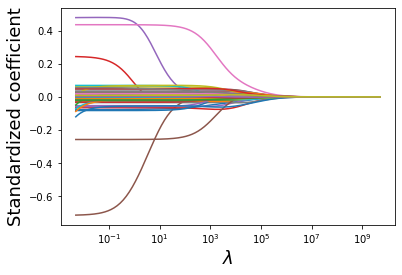

In [15]:
#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [16]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

15.811388300841896

Text(0, 0.5, 'Cross-validation error')

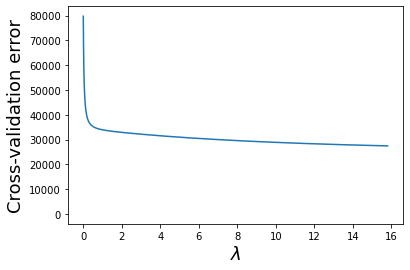

In [17]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[40,40.2],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

Text(0, 0.5, 'Standardized coefficient')

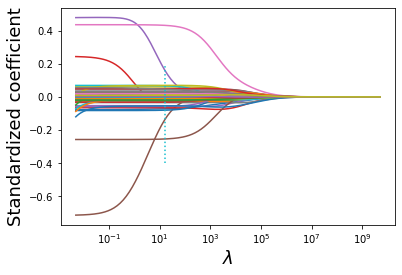

In [18]:
#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,200)*0.5
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[-0.4,0.2],':')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [19]:
#Test dataset
#Standardizing test data
Xtest_std = scaler.transform(X_test)

In [20]:
#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred_1=ridge.predict(Xtest_std)

In [22]:
#RMSE on test data
np.sqrt(((np.exp(pred_1)-y_test)**2).mean())

11000.54448545831

In [23]:
#R-squared on test data for the ridge regression model
r2_score(pred_1,np.log(y_test))

-5.605389787874143

## (b) Lasso

In [24]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [25]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'Standardized coefficient')

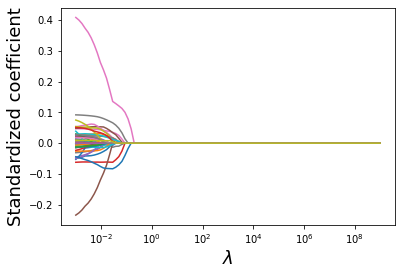

In [26]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [27]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.0005879247770260784

Text(0, 0.5, 'Cross-validation error')

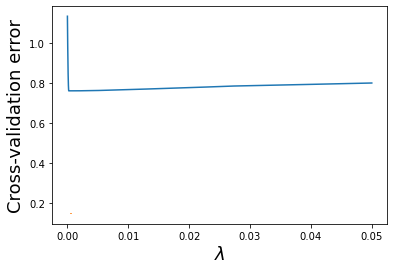

In [28]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0.145,0.151],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

In [29]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred_2=lasso.predict(Xtest_std)

In [31]:
#RMSE on test data
np.sqrt(((np.exp(pred_2)-y_test)**2).mean())

11001.737167062633

In [32]:
#R-squared on test data for the lasso model
r2_score(pred_2,np.log(test[' shares']))

-5.741836162635406